# Visualization of vector space

Previously we created a vector space from review texts using tf-idf. In this part we will try to visualize this vector space using three algorithms and compare them. PCA, LLE, t-SNE.

We will use sklearn library to perform these projections. We have leveraged the following examples to create these visualizations. 

1. <a href="https://www.datacamp.com/community/tutorials/introduction-t-sne">Datacamp Tutorial of PCA and t-SNE</a>

2. <a href="https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py">Sklearn Example of  PCA vs LDA</a>
3. <a href="https://scikit-learn.org/stable/auto_examples/manifold/plot_swissroll.html#sphx-glr-auto-examples-manifold-plot-swissroll-py">Sklearn Example of Swissroll</a>
4. <a href="https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py">Sklearn Example of Manifold Comparison</a>

In [1]:
import pandas as pd
import numpy as np

df_train = pd.read_csv("drugsCom_raw/train.csv")

In [2]:
from sklearn.model_selection import train_test_split

random_state = 23

X_train, X_test, y_train, y_test = train_test_split(df_train.review.values, df_train.sentiment.values, train_size=0.01, random_state=random_state)
target_names = ["negatief", "positief"]

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_tfidf = TfidfVectorizer(ngram_range=(1, 1), max_features=10).fit_transform(X_train).toarray()

In [4]:
X_tfidf.shape

(1594, 10)

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from collections import OrderedDict
from time import time

from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE

In [6]:
n_components = 2
n_neighbors = 5

methods = OrderedDict()

methods["PCA"] = PCA(n_components=n_components, random_state=random_state)

methods["LLE"] = LocallyLinearEmbedding(n_components=n_components, n_neighbors=n_neighbors, random_state=random_state)

methods["t-SNE"] = TSNE(n_components=n_components, init="pca", learning_rate="auto", n_iter=300, random_state=random_state)

In [7]:
y_train.shape

(1594,)

PCA: 0.0041 sec
LLE: 0.39 sec
LLE2: 0.4 sec


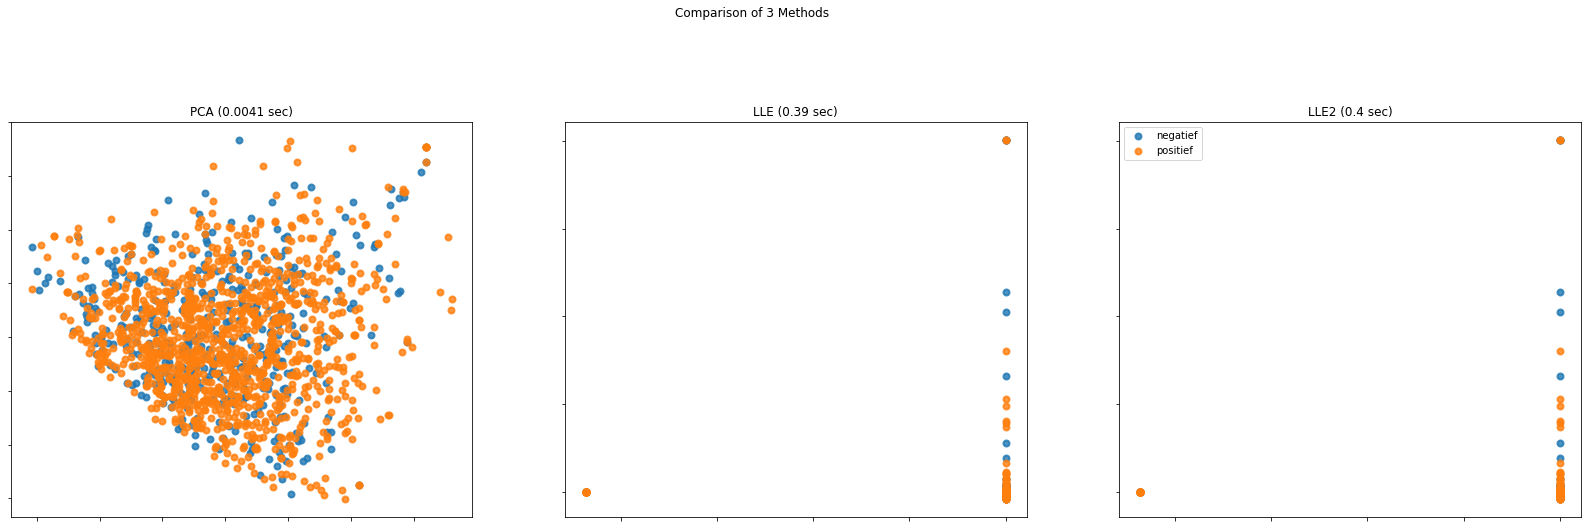

In [17]:
# Create figure
fig = plt.figure(figsize=(48, 16))
lw = 2

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X_tfidf)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    
    for i, target_name in enumerate(target_names):
        ax.scatter(Y[y_train == i, 0], Y[y_train == i, 1], cmap=plt.cm.Spectral, alpha=0.8, lw=lw, label=target_name)
        
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

plt.legend(loc="best", shadow=False)
plt.suptitle("Comparison of 3 Methods")
plt.show()